### Step 1:
Load the dataset

In [5]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [3]:
retail= pd.read_csv(r"C:\Users\naveen kumar pandey\Desktop\DATA ANALYTICS\PYTHON\ML and Dl\Online_Retail_II_10000_rows (1).csv")
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,DiscountApplied,ProductCategory,CustomerID,Country,TotalTransactionValue,CustomerLifetimeValue,AvgPurchaseFrequency,AvgBasketSize,Recency
0,100000,17270,Item A,8,2023-08-29,20.45,False,Electronics,1378,Belgium,163.60,4659.61,0.021918,9.500000,63
1,100571,14312,Item C,2,2023-10-30,81.73,True,Kitchenware,1378,Australia,163.46,4659.61,0.021918,9.500000,63
2,100846,19504,Item A,8,2023-08-30,11.31,True,Electronics,1378,France,90.48,4659.61,0.021918,9.500000,63
3,102874,19428,Item B,10,2023-05-22,95.60,True,Kitchenware,1378,Germany,956.00,4659.61,0.021918,9.500000,63
4,104068,13801,Item A,11,2023-09-15,83.93,False,Stationery,1378,Germany,923.23,4659.61,0.021918,9.500000,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,109589,18216,Item E,10,2023-11-29,93.14,True,Kitchenware,1900,Netherlands,931.40,2512.72,0.010959,10.250000,33
9996,107409,10858,Item B,2,2023-11-12,70.10,False,Stationery,1078,Spain,140.20,1623.49,0.008219,9.333333,16
9997,107574,18809,Item A,9,2023-06-14,59.75,True,Kitchenware,1078,France,537.75,1623.49,0.008219,9.333333,16
9998,109500,18720,Item B,17,2023-12-16,55.62,False,Stationery,1078,Spain,945.54,1623.49,0.008219,9.333333,16


####  Removing Unnecessary variable

In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   InvoiceNo              10000 non-null  int64  
 1   StockCode              10000 non-null  int64  
 2   Description            10000 non-null  object 
 3   Quantity               10000 non-null  int64  
 4   InvoiceDate            10000 non-null  object 
 5   UnitPrice              10000 non-null  float64
 6   DiscountApplied        10000 non-null  bool   
 7   ProductCategory        10000 non-null  object 
 8   CustomerID             10000 non-null  int64  
 9   Country                10000 non-null  object 
 10  TotalTransactionValue  10000 non-null  float64
 11  CustomerLifetimeValue  10000 non-null  float64
 12  AvgPurchaseFrequency   10000 non-null  float64
 13  AvgBasketSize          10000 non-null  float64
 14  Recency                10000 non-null  int64  
dtypes: 

In [6]:
retail = retail.drop(columns=['InvoiceDate'])
retail = retail.drop(columns=['CustomerID'])

le = LabelEncoder()
retail['Description'] = le.fit_transform(retail['Description'])
retail['DiscountApplied'] = le.fit_transform(retail['DiscountApplied'])
retail['ProductCategory'] = le.fit_transform(retail['ProductCategory'])
retail['Country'] = le.fit_transform(retail['Country'])

In [8]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,DiscountApplied,ProductCategory,Country,TotalTransactionValue,CustomerLifetimeValue,AvgPurchaseFrequency,AvgBasketSize,Recency
0,100000,17270,0,8,20.45,0,1,1,163.60,4659.61,0.021918,9.5,63
1,100571,14312,2,2,81.73,1,3,0,163.46,4659.61,0.021918,9.5,63
2,100846,19504,0,8,11.31,1,1,2,90.48,4659.61,0.021918,9.5,63
3,102874,19428,1,10,95.60,1,3,3,956.00,4659.61,0.021918,9.5,63
4,104068,13801,0,11,83.93,0,4,3,923.23,4659.61,0.021918,9.5,63


### Step 2:
Extract the measurements from the DataFrame using its .values attribute:

In [9]:
samples = retail.iloc[:, 2:15].values # get all row and columne with header
samples

array([[0.00000000e+00, 8.00000000e+00, 2.04500000e+01, ...,
        2.19178082e-02, 9.50000000e+00, 6.30000000e+01],
       [2.00000000e+00, 2.00000000e+00, 8.17300000e+01, ...,
        2.19178082e-02, 9.50000000e+00, 6.30000000e+01],
       [0.00000000e+00, 8.00000000e+00, 1.13100000e+01, ...,
        2.19178082e-02, 9.50000000e+00, 6.30000000e+01],
       ...,
       [0.00000000e+00, 9.00000000e+00, 5.97500000e+01, ...,
        8.21917808e-03, 9.33333333e+00, 1.60000000e+01],
       [1.00000000e+00, 1.70000000e+01, 5.56200000e+01, ...,
        8.21917808e-03, 9.33333333e+00, 1.60000000e+01],
       [1.00000000e+00, 5.00000000e+00, 6.00800000e+01, ...,
        2.73972603e-03, 5.00000000e+00, 1.50000000e+02]])

### Step 3: Elbow Method
1. Measure the quality of clusterings with different numbers of clusters using the inertia.

2. For each of the given values of k, perform the following steps:
3. Create a KMeans instance called model with k clusters.
4. Fit the model to the grain data samples.
5. Append the value of the inertia_ attribute of model to the list inertias.

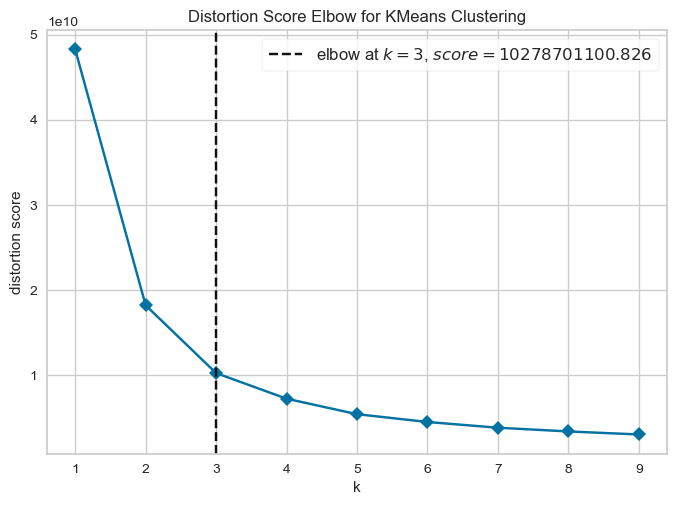

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,10),timings=False)
visualizer.fit(samples)        # Fit the data to the visualizer
visualizer.show()

# Model or Algorithm

In [11]:
model2 = KMeans(n_clusters=3,max_iter=100,random_state=42)

In [12]:
retail['Cluster_Made'] = model2.fit_predict(samples)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,DiscountApplied,ProductCategory,Country,TotalTransactionValue,CustomerLifetimeValue,AvgPurchaseFrequency,AvgBasketSize,Recency,Cluster_Made
0,100000,17270,0,8,20.45,0,1,1,163.60,4659.61,0.021918,9.5,63,0
1,100571,14312,2,2,81.73,1,3,0,163.46,4659.61,0.021918,9.5,63,0
2,100846,19504,0,8,11.31,1,1,2,90.48,4659.61,0.021918,9.5,63,0
3,102874,19428,1,10,95.60,1,3,3,956.00,4659.61,0.021918,9.5,63,0
4,104068,13801,0,11,83.93,0,4,3,923.23,4659.61,0.021918,9.5,63,0


In [13]:
retail.Cluster_Made = retail.Cluster_Made.replace([0,1,2],['First Group','Second Group','Third Group'])
retail.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,DiscountApplied,ProductCategory,Country,TotalTransactionValue,CustomerLifetimeValue,AvgPurchaseFrequency,AvgBasketSize,Recency,Cluster_Made
0,100000,17270,0,8,20.45,0,1,1,163.60,4659.61,0.021918,9.5,63,First Group
1,100571,14312,2,2,81.73,1,3,0,163.46,4659.61,0.021918,9.5,63,First Group
2,100846,19504,0,8,11.31,1,1,2,90.48,4659.61,0.021918,9.5,63,First Group
3,102874,19428,1,10,95.60,1,3,3,956.00,4659.61,0.021918,9.5,63,First Group
4,104068,13801,0,11,83.93,0,4,3,923.23,4659.61,0.021918,9.5,63,First Group


### Final Cluster Centorids

In [14]:
model2.cluster_centers_

array([[2.01632868e+00, 9.75823018e+00, 4.71627469e+01, 4.96181196e-01,
        2.46299710e+00, 3.56544641e+00, 4.43279055e+02, 3.73125071e+03,
        2.37772430e-02, 9.78882656e+00, 3.77785093e+01],
       [1.98377863e+00, 1.07302004e+01, 5.17898640e+01, 4.89980916e-01,
        2.50739504e+00, 3.54270038e+00, 5.57581684e+02, 6.17522252e+03,
        3.15088100e-02, 1.07043954e+01, 2.78838263e+01],
       [1.99701641e+00, 1.15211338e+01, 5.52357633e+01, 5.01243163e-01,
        2.41272999e+00, 3.52113376e+00, 6.43263550e+02, 9.03707425e+03,
        3.94242624e-02, 1.15171556e+01, 2.25937345e+01]])

In [15]:
retail.Cluster_Made.value_counts(ascending=False)


Cluster_Made
Second Group    4193
First Group     3796
Third Group     2011
Name: count, dtype: int64

# Business Submission

In [19]:
Submission = retail.loc[:,['CustomerLifetimeValue','AvgBasketSize','Cluster_Made']]
Submission

,CustomerLifetimeValue,AvgBasketSize,Cluster_Made
0,4659.61,9.500000,First Group
1,4659.61,9.500000,First Group
2,4659.61,9.500000,First Group
3,4659.61,9.500000,First Group
4,4659.61,9.500000,First Group
...,...,...,...
9995,2512.72,10.250000,First Group
9996,1623.49,9.333333,First Group
9997,1623.49,9.333333,First Group
9998,1623.49,9.333333,First Group


# Finished